In [110]:
import os 
import numpy as np 
import cv2
import glob
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Model
import re
import pydicom
from PIL import Image
import numpy as np
import dicom2jpg
import shutil
from scipy.ndimage import label
from tensorflow.keras.preprocessing import image as imb


In [111]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


def delete_all_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            # Construct the full file path
            file_path = os.path.join(root, file_name)
            # Check if it's a file (not a directory)
            if os.path.isfile(file_path):
                # Delete the file
                os.remove(file_path)

    

    

In [112]:


inputdir = '/home/keanuf/.cache/Assignemt9/BRAIN SEGMENTATION/FULL_BRAIN/testDicom copy'
temp = 'temp'



#os.mkdir(outdir)
create_dir(temp)
delete_all_files(temp)

dicom2jpg.dicom2png(inputdir, temp) 

True

In [113]:




def find_and_copy_png_files(source_dir, destination_dir):
    # Walk through all directories and subdirectories in the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Check if the file is a PNG file
            if file.lower().endswith('.png'):
                # Copy the PNG file to the destination directory
                shutil.copy2(os.path.join(root, file), destination_dir)

# Specify the source directory containing the folders
source_directory = temp

# Specify the destination directory to save the PNG files
outdir = "PNG_images"
create_dir(outdir)
delete_all_files(outdir)
# Call the function to find and copy PNG files
find_and_copy_png_files(source_directory, outdir)

print("PNG files copied successfully.")
delete_all_files(source_directory)

PNG files copied successfully.


In [114]:
items = os.listdir(inputdir)
first_item_path=""
if items:
    first_item = items[0]
    first_item_path = os.path.abspath(os.path.join(inputdir, first_item))
    first_item_path_raw = r"{}".format(first_item_path)
    print("Full path to the first item (raw string):", first_item_path_raw)
else:
    print("The folder is empty.")

Full path to the first item (raw string): /home/keanuf/.cache/Assignemt9/BRAIN SEGMENTATION/FULL_BRAIN/testDicom copy/ADNI_014_S_0548_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20100809091716144_343_S90230_I189758.dcm


In [115]:
dicom_file_path = first_item_path

# Read the DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract patient information
patient_info = {
    "Patient Name": dicom_data.get("PatientName", "N/A"),
    "Patient ID": dicom_data.get("PatientID", "N/A"),
    "Patient Birth Date": dicom_data.get("PatientBirthDate", "N/A"),
    "Patient Sex": dicom_data.get("PatientSex", "N/A"),
    "Patient Age": dicom_data.get("PatientAge", "N/A"),
    "Patient Weight": dicom_data.get("PatientWeight", "N/A"),
    "Patient Address": dicom_data.get("PatientAddress", "N/A"),
}

# Print patient information
for key, value in patient_info.items():
    print(f"{key}: {value}")

Patient Name: 014_S_0548
Patient ID: 014_S_0548
Patient Birth Date: N/A
Patient Sex: F
Patient Age: N/A
Patient Weight: 56.25
Patient Address: N/A


In [116]:
test_path=outdir
directory = test_path
import os
import re
def natural_sort_key(s):
    """ Sort string in a human-readable way, handling numbers correctly. """
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

# Get a list of all the png files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.png')]
files.sort(key=natural_sort_key)

# Rename each file
for i, filename in enumerate(files):
    new_name = f"{i}.png"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_name))



In [117]:
dataset_path = os.path.join("dataset", "aug")
files_dir= os.path.join("files", "aug")
model_file=os.path.join(files_dir, "unet_FULL_BRAIN.h5")
prediction_file=os.path.join(files_dir, "brainmodel.h5")








create_dir(files_dir)

In [118]:
save_path=  os.path.join("prediction")
create_dir(save_path)
delete_all_files(save_path)
model2=tf.keras.models.load_model(model_file)
model2.summary()



Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_18 (BatchN  (None, 128, 128, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                              

In [119]:

test_x=sorted(glob.glob(os.path.join(outdir,"*")))

print(len(test_x))
time_taken=[]
import time
for x in tqdm(test_x):
    name=x.split("/")[-1]
    print(name)
    x= cv2.imread(x ,cv2.IMREAD_COLOR)
    x=x / 255.0
    x=np.expand_dims(x,axis=0)
    start_time=time.time()
    p= model2.predict(x)[0]
    total_time=time.time()-start_time
    time_taken.append(total_time)
    p=p>0.5
    p=p*255
    cv2.imwrite(os.path.join(save_path, name),p)


82


  0%|          | 0/82 [00:00<?, ?it/s]

0.png
1/1 [==============================] - 0s 342ms/step


  1%|          | 1/82 [00:00<00:35,  2.31it/s]

1.png
1/1 [==============================] - 0s 23ms/step


  2%|▏         | 2/82 [00:00<00:19,  4.07it/s]

10.png
1/1 [==============================] - 0s 23ms/step


  4%|▎         | 3/82 [00:00<00:14,  5.57it/s]

11.png
1/1 [==============================] - 0s 22ms/step
12.png
1/1 [==============================] - 0s 24ms/step


  6%|▌         | 5/82 [00:00<00:10,  7.41it/s]

13.png
1/1 [==============================] - 0s 24ms/step
14.png
1/1 [==============================] - 0s 23ms/step


  9%|▊         | 7/82 [00:01<00:08,  8.48it/s]

15.png
1/1 [==============================] - 0s 36ms/step


 10%|▉         | 8/82 [00:01<00:09,  8.11it/s]

16.png
1/1 [==============================] - 0s 28ms/step


 11%|█         | 9/82 [00:01<00:09,  7.94it/s]

17.png
1/1 [==============================] - 0s 23ms/step
18.png
1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 11/82 [00:01<00:08,  8.49it/s]

19.png
1/1 [==============================] - 0s 22ms/step
2.png
1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 13/82 [00:01<00:07,  9.26it/s]

20.png
1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 14/82 [00:01<00:07,  9.34it/s]

21.png
1/1 [==============================] - 0s 26ms/step
22.png
1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 16/82 [00:01<00:06, 10.60it/s]

23.png
1/1 [==============================] - 0s 30ms/step
24.png
1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 18/82 [00:02<00:05, 11.82it/s]

25.png
1/1 [==============================] - 0s 20ms/step
26.png
1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 20/82 [00:02<00:04, 12.93it/s]

27.png
1/1 [==============================] - 0s 23ms/step
28.png
1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 22/82 [00:02<00:04, 13.67it/s]

29.png
1/1 [==============================] - 0s 20ms/step
3.png
1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 24/82 [00:02<00:04, 14.32it/s]

30.png
1/1 [==============================] - 0s 33ms/step
31.png
1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 26/82 [00:02<00:04, 13.50it/s]

32.png
1/1 [==============================] - 0s 22ms/step
33.png
1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 28/82 [00:02<00:03, 14.37it/s]

34.png
1/1 [==============================] - 0s 25ms/step
35.png
1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 30/82 [00:02<00:03, 14.76it/s]

36.png
1/1 [==============================] - 0s 26ms/step
37.png
1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 32/82 [00:03<00:03, 14.82it/s]

38.png
1/1 [==============================] - 0s 26ms/step
39.png
1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 34/82 [00:03<00:03, 14.74it/s]

4.png
1/1 [==============================] - 0s 22ms/step
40.png
1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 36/82 [00:03<00:03, 14.90it/s]

41.png
1/1 [==============================] - 0s 25ms/step
42.png
1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 38/82 [00:03<00:02, 15.10it/s]

43.png
1/1 [==============================] - 0s 24ms/step
44.png
1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 40/82 [00:03<00:02, 15.14it/s]

45.png
1/1 [==============================] - 0s 22ms/step
46.png
1/1 [==============================] - 0s 22ms/step


 51%|█████     | 42/82 [00:03<00:02, 15.06it/s]

47.png
1/1 [==============================] - 0s 22ms/step
48.png
1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 44/82 [00:03<00:02, 14.60it/s]

49.png
1/1 [==============================] - 0s 33ms/step
5.png
1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 46/82 [00:03<00:02, 14.11it/s]

50.png
1/1 [==============================] - 0s 26ms/step
51.png
1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 48/82 [00:04<00:02, 14.07it/s]

52.png
1/1 [==============================] - 0s 24ms/step
53.png
1/1 [==============================] - 0s 21ms/step


 61%|██████    | 50/82 [00:04<00:02, 14.35it/s]

54.png
1/1 [==============================] - 0s 22ms/step
55.png
1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 52/82 [00:04<00:02, 14.69it/s]

56.png
1/1 [==============================] - 0s 23ms/step
57.png
1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 54/82 [00:04<00:01, 14.52it/s]

58.png
1/1 [==============================] - 0s 27ms/step
59.png
1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 56/82 [00:04<00:01, 14.04it/s]

6.png
1/1 [==============================] - 0s 22ms/step
60.png
1/1 [==============================] - 0s 24ms/step


 71%|███████   | 58/82 [00:04<00:01, 14.10it/s]

61.png
1/1 [==============================] - 0s 24ms/step
62.png
1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 60/82 [00:04<00:01, 14.27it/s]

63.png
1/1 [==============================] - 0s 27ms/step
64.png
1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 62/82 [00:05<00:01, 14.28it/s]

65.png
1/1 [==============================] - 0s 25ms/step
66.png
1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 64/82 [00:05<00:01, 14.06it/s]

67.png
1/1 [==============================] - 0s 21ms/step
68.png
1/1 [==============================] - 0s 21ms/step


 80%|████████  | 66/82 [00:05<00:01, 14.51it/s]

69.png
1/1 [==============================] - 0s 22ms/step
7.png
1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 68/82 [00:05<00:01, 13.48it/s]

70.png
1/1 [==============================] - 0s 22ms/step
71.png
1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 70/82 [00:05<00:00, 13.82it/s]

72.png
1/1 [==============================] - 0s 27ms/step
73.png
1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 72/82 [00:05<00:00, 13.65it/s]

74.png
1/1 [==============================] - 0s 21ms/step
75.png
1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 74/82 [00:05<00:00, 13.98it/s]

76.png
1/1 [==============================] - 0s 20ms/step
77.png
1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 76/82 [00:06<00:00, 14.51it/s]

78.png
1/1 [==============================] - 0s 21ms/step
79.png
1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 78/82 [00:06<00:00, 14.94it/s]

8.png
1/1 [==============================] - 0s 22ms/step
80.png
1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 80/82 [00:06<00:00, 15.02it/s]

81.png
1/1 [==============================] - 0s 21ms/step
9.png
1/1 [==============================] - 0s 21ms/step


100%|██████████| 82/82 [00:06<00:00, 12.64it/s]


In [120]:
import os
import numpy as np
from scipy.ndimage import binary_fill_holes
from PIL import Image

# Function to process and save an image
def process_image(image_path, output_path, threshold_value=128):
    # Load the grayscale image
    grayscale_image = Image.open(image_path).convert('L')
    grayscale_array = np.array(grayscale_image)

    # Threshold the grayscale image to get a binary image
    binary_image = grayscale_array > threshold_value

    # Fill holes in the binary image
    filled_binary_image = binary_fill_holes(binary_image)

    # Convert the filled binary image back to grayscale
    filled_grayscale_array = (filled_binary_image * 255).astype(np.uint8)

    # Convert the numpy array back to a PIL image
    filled_grayscale_image = Image.fromarray(filled_grayscale_array)

    # Save the resulting image
    filled_grayscale_image.save(output_path)

# Function to process all images in a folder
def process_folder(input_folder, output_folder, threshold_value=128):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.png'):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            process_image(input_path, output_path, threshold_value)
            print(f"Processed and saved: {output_path}")

# Define input and output folders
input_folder_fill = save_path
output_folder_fill = os.path.join('temp_bin_images')

delete_all_files(output_folder_fill)
# Process all images in the input folder
process_folder(input_folder_fill, output_folder_fill)
save_path=output_folder_fill

Processed and saved: temp_bin_images/23.png
Processed and saved: temp_bin_images/78.png
Processed and saved: temp_bin_images/63.png
Processed and saved: temp_bin_images/79.png
Processed and saved: temp_bin_images/42.png
Processed and saved: temp_bin_images/24.png
Processed and saved: temp_bin_images/60.png
Processed and saved: temp_bin_images/61.png
Processed and saved: temp_bin_images/28.png
Processed and saved: temp_bin_images/34.png
Processed and saved: temp_bin_images/75.png
Processed and saved: temp_bin_images/70.png
Processed and saved: temp_bin_images/2.png
Processed and saved: temp_bin_images/59.png
Processed and saved: temp_bin_images/18.png
Processed and saved: temp_bin_images/4.png
Processed and saved: temp_bin_images/22.png
Processed and saved: temp_bin_images/10.png
Processed and saved: temp_bin_images/20.png
Processed and saved: temp_bin_images/55.png
Processed and saved: temp_bin_images/76.png
Processed and saved: temp_bin_images/37.png
Processed and saved: temp_bin_imag

In [121]:
import os
from PIL import Image
def composite_images(image_folder, mask_folder, output_folder):
    # Get the list of image files in the input folder
    image_files = os.listdir(image_folder)
    
    # Iterate through each image file
    for image_file in image_files:
        # Construct the file paths for the current image and its corresponding mask
        image_path = os.path.join(image_folder, image_file)
        mask_file = image_file.split('.')[0] + '.png'  # Assuming masks have the same filename format as images
        mask_path = os.path.join(mask_folder, mask_file)
        
        # Open the image and mask
        image = Image.open(image_path)
        mask = Image.open(mask_path)
        
        # Perform composite operation
        result = Image.composite(image, Image.new('RGB', image.size, (0, 0, 0)), mask)
        
        # Construct the output file path
        output_file = os.path.join(output_folder, image_file)
        
        # Save the resulting composite image
        result.save(output_file) 

# Paths to input image and mask folders, and output folder
image_folder = test_path


mask_folder  = save_path
output_folder= os.path.join("segmentation")

create_dir(mask_folder )

create_dir(output_folder)
delete_all_files(output_folder)

# Call the function to composite images and masks and save the results
composite_images(image_folder, mask_folder, output_folder)

In [122]:
image_folder = output_folder # Change this to your folder path

# Get a list of all image files in the folder
image_files = glob.glob(os.path.join(image_folder, '*.*g'))  # This will include jpg, png, etc.

# Loop through each image file in the folder
image_files = glob.glob(os.path.join(image_folder, '*.*g'))  # This will include jpg, png, etc.

# Loop through each image file in the folder
for image_path in image_files:
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert the image to grayscale if it is not already
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Convert the image to a binary image
    _, bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Identify the connected components in the binary image
    labeled_array, num_features = label(bw)
    
    # Check if the number of islands is greater than 5
    if num_features > 5:
        # Delete the image if it has more than 5 islands
        os.remove(image_path)
        print(f'Deleted {os.path.basename(image_path)}')
        mask_image_path = os.path.join(mask_folder, os.path.basename(image_path))
        
        # Check if the mask image exists and delete it
        if os.path.exists(mask_image_path):
            os.remove(mask_image_path)
            print(f'Deleted mask {os.path.basename(mask_image_path)}')

print('Processing complete.')


Deleted 28.png
Deleted mask 28.png
Deleted 34.png
Deleted mask 34.png
Deleted 75.png
Deleted mask 75.png
Deleted 70.png
Deleted mask 70.png
Deleted 57.png
Deleted mask 57.png
Deleted 50.png
Deleted mask 50.png
Deleted 81.png
Deleted mask 81.png
Deleted 51.png
Deleted mask 51.png
Deleted 17.png
Deleted mask 17.png
Deleted 33.png
Deleted mask 33.png
Deleted 27.png
Deleted mask 27.png
Processing complete.


In [123]:
# Threshold for considering a pixel as black (0-255 scale)
black_threshold = 100  # Adjust this value as needed

# Percentage threshold for considering an image mostly black
percentage_threshold = 90  # Adjust this value as needed

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]

# Loop through each image file in the folder
for image_file in image_files:
    # Get the full path of the image
    image_path = os.path.join(image_folder, image_file)
    
    # Read the image
    img = cv2.imread(image_path)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    total_pixels = img.size
    num_black_pixels = np.sum(img < black_threshold)
    black_percentage = (num_black_pixels / total_pixels) * 100
    if black_percentage > percentage_threshold:

        os.remove(image_path)
        print(f'Deleted {image_file}')

        mask_image_path = os.path.join(mask_folder, image_file)
        

        if os.path.exists(mask_image_path):
            os.remove(mask_image_path)
            print(f'Deleted mask {image_file}')

print('Processing complete.')

Deleted 23.png
Deleted mask 23.png
Deleted 63.png
Deleted mask 63.png
Deleted 60.png
Deleted mask 60.png
Deleted 61.png
Deleted mask 61.png
Deleted 59.png
Deleted mask 59.png
Deleted 18.png
Deleted mask 18.png
Deleted 22.png
Deleted mask 22.png
Deleted 55.png
Deleted mask 55.png
Deleted 76.png
Deleted mask 76.png
Deleted 48.png
Deleted mask 48.png
Deleted 62.png
Deleted mask 62.png
Deleted 68.png
Deleted mask 68.png
Deleted 77.png
Deleted mask 77.png
Deleted 74.png
Deleted mask 74.png
Deleted 52.png
Deleted mask 52.png
Deleted 56.png
Deleted mask 56.png
Deleted 31.png
Deleted mask 31.png
Deleted 73.png
Deleted mask 73.png
Deleted 47.png
Deleted mask 47.png
Deleted 32.png
Deleted mask 32.png
Deleted 49.png
Deleted mask 49.png
Deleted 58.png
Deleted mask 58.png
Deleted 71.png
Deleted mask 71.png
Deleted 65.png
Deleted mask 65.png
Deleted 64.png
Deleted mask 64.png
Deleted 19.png
Deleted mask 19.png
Deleted 25.png
Deleted mask 25.png
Deleted 26.png
Deleted mask 26.png
Deleted 46.png
Delet

In [124]:


model_pred=tf.keras.models.load_model(prediction_file)
model_pred.summary()

results = []
folder_path=output_folder
# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file types
        # Load and preprocess the image
        img_path = os.path.join(folder_path, filename)
        img = imb.load_img(img_path, target_size=(128, 128))
        img_array = imb.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0

        # Make a prediction
        predictions = model_pred.predict(img_array)

        # Save the filename and prediction to the results list
        if predictions[0][0] > 0.5:
            results.append(('AD', str(round(((predictions[0][0]-0.5)/0.5)*100, 2))+"%"))
        else:
            results.append(('CN', str(round(((0.5-predictions[0][0])/0.5)*100, 2))+"%"))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      864       
                                                                 
 activation_7 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      9216      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [125]:
import os
import re
import cv2

area_array = []
png_arra = []
total_value= []
image_directory = mask_folder
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

for filename in sorted_filenames:
    file_path = os.path.join(image_directory, filename)
    png_arra.append(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    white_pixel_count = cv2.countNonZero(image)
    area_array.append(white_pixel_count)

print(area_array)

image_directory = output_folder
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

for filename in sorted_filenames:
    file_path = os.path.join(image_directory, filename)
    png_arra.append(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    total = np.sum(image)
    total_value.append(total)

#print(area_array, len(area_array))
#print(total_value, len(total_value))
#print(png_arra, len(png_arra))

array1= np.array(area_array)
array2=np.array(total_value)

print("Shape of array1:", array1.shape)
print("Shape of array2:", array2.shape)
result = np.where(array2 != 0,  array2/array1 , 0)

areas=array1

[4441, 4476, 4543, 4592, 4663, 4710, 4728, 4733, 3667, 3505, 3347, 3162, 2952, 2698, 2476, 2220, 1996, 4371, 4513, 4502, 4548, 4628, 4708, 4762, 4734, 4734, 4744, 4732, 2335, 2898, 4733, 4719, 4667]
Shape of array1: (33,)
Shape of array2: (33,)


In [126]:
print(result)

[129.52443143 126.85254692 130.48404138 128.17399826 131.29573236
 139.492569   137.18506768 132.22269174 147.1213526  144.54122682
 156.71198088 153.56894371 155.08468835 149.10303929 143.10056543
 151.93468468 162.84819639 123.38686799 134.45402172 126.37027988
 124.32761653 130.05099395 135.23746814 137.85678286 130.01858893
 124.97401774 128.2329258  133.83685545 132.57815846 126.26224983
 127.06486372 132.38609875 133.50610671]


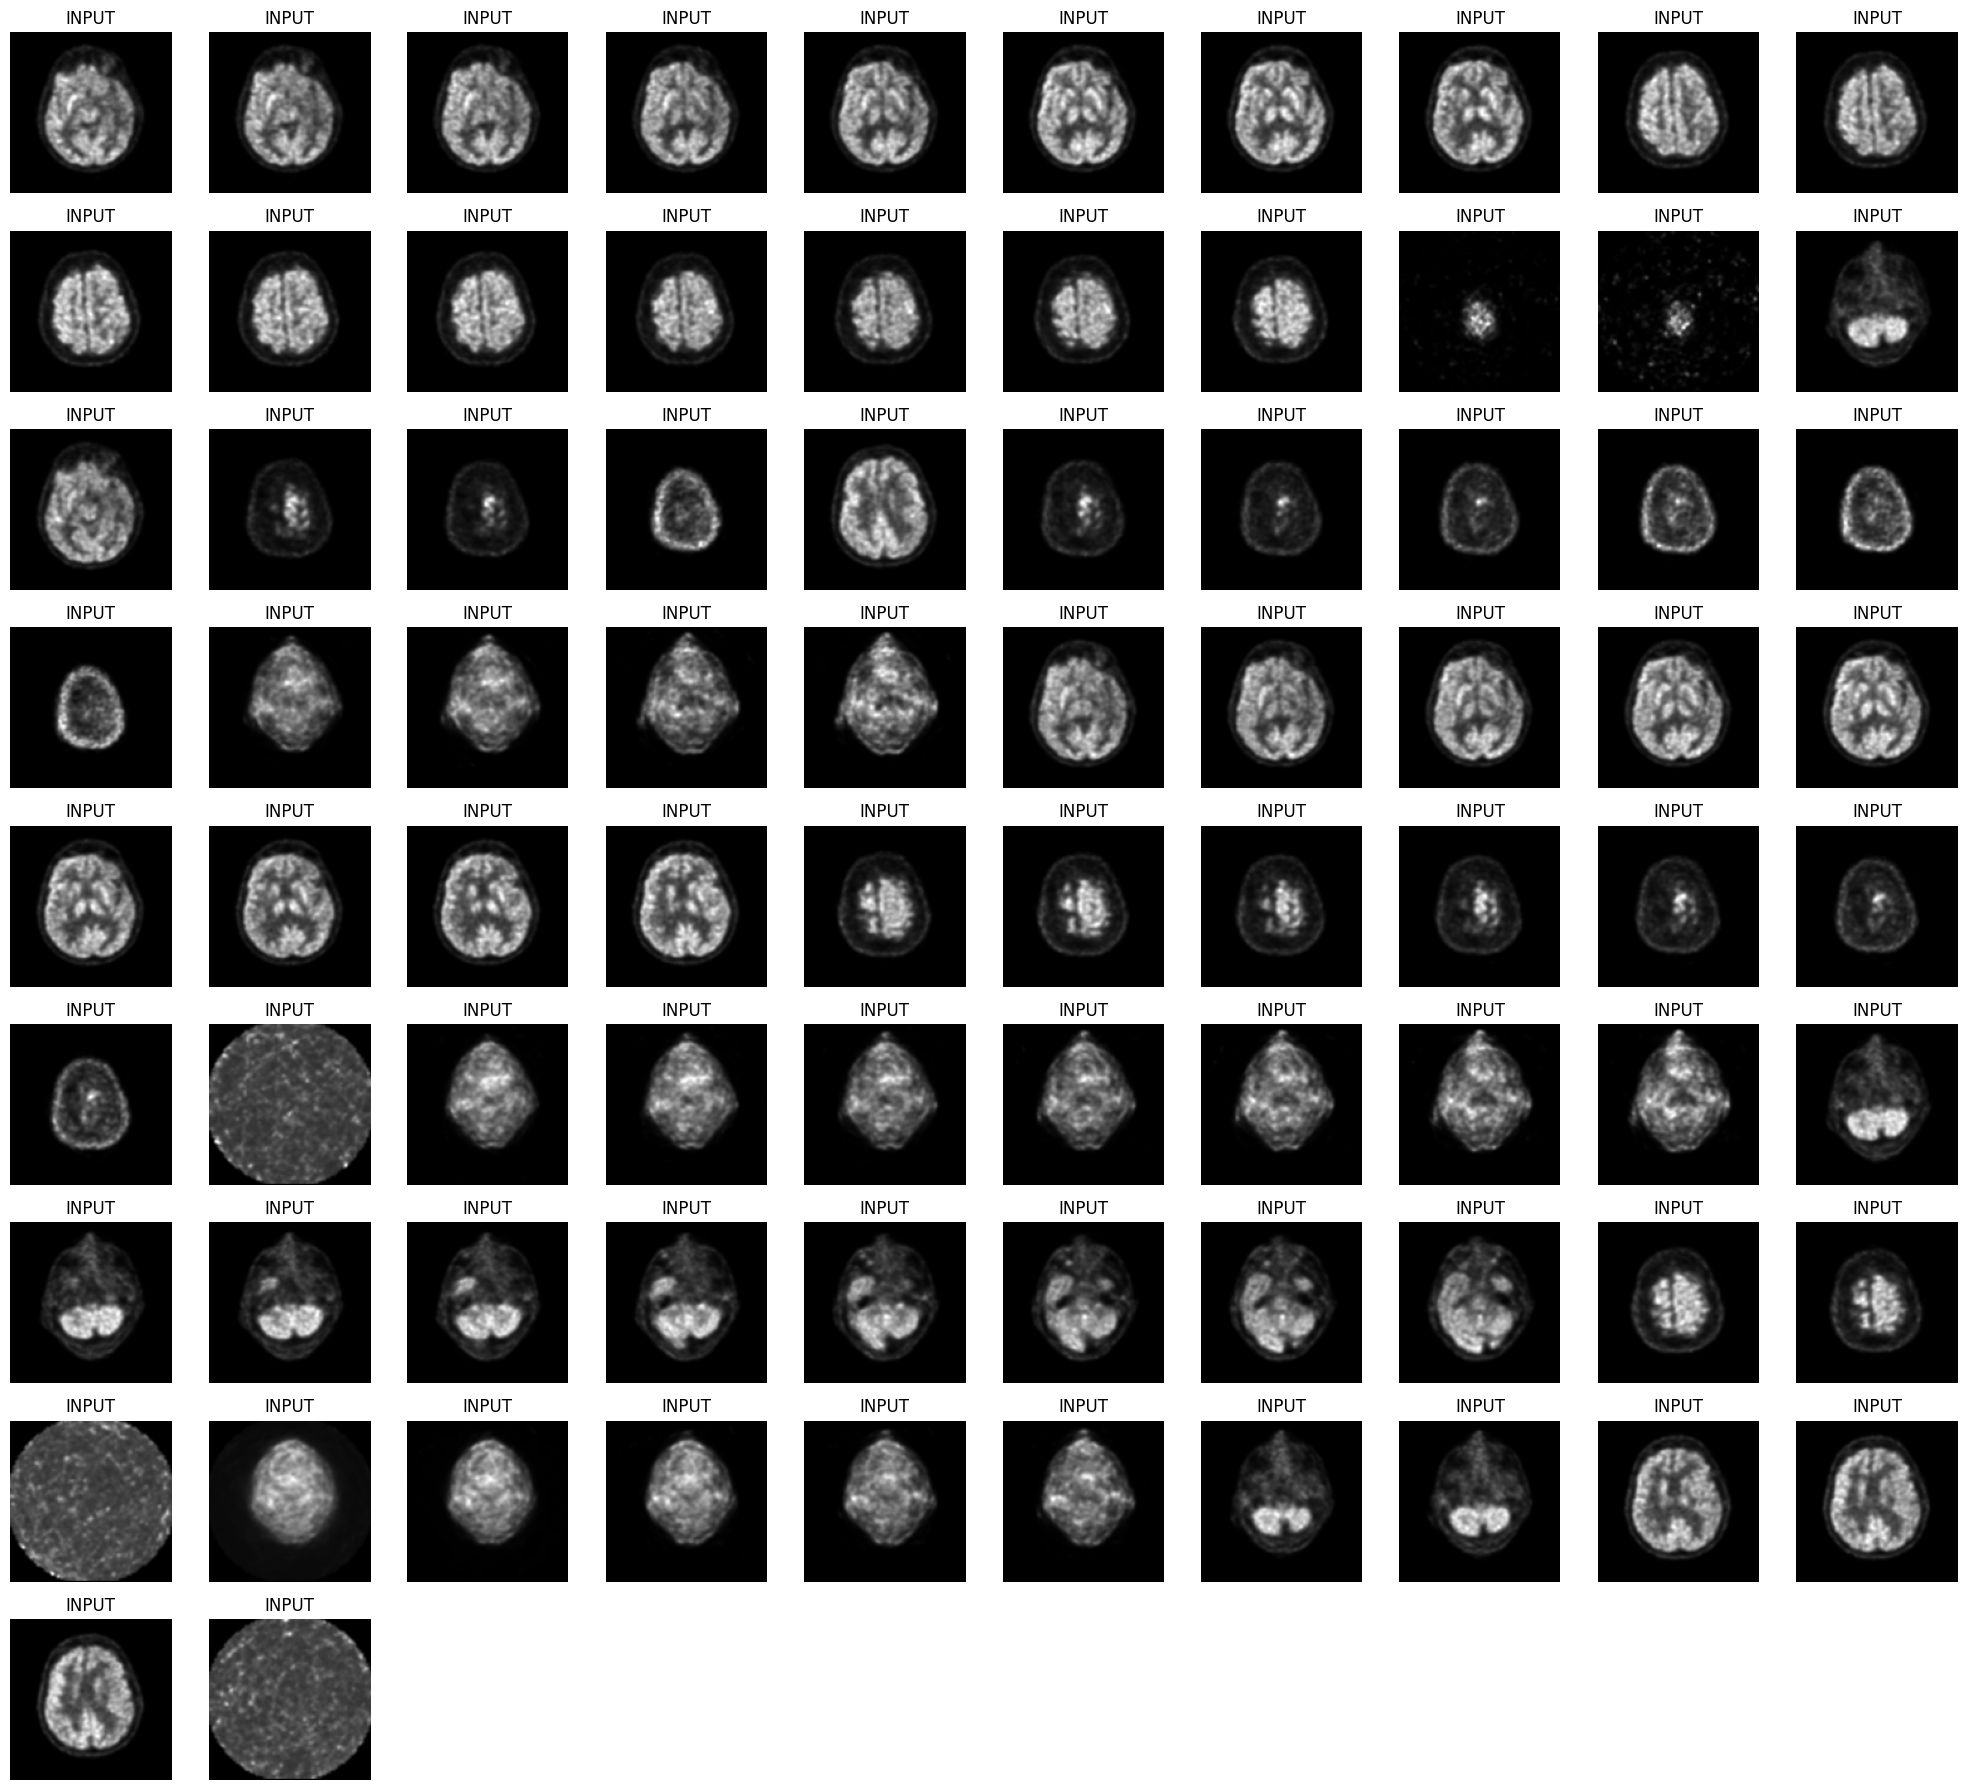

In [127]:
import matplotlib.pyplot as plt
import math
image_directory = test_path
 # Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename in zip(ax_row, sorted_filenames[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        ax.set_title("INPUT")  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Patient Name: 014_S_0548
Patient ID: 014_S_0548
Patient Birth Date: N/A
Patient Sex: F
Patient Age: N/A
Patient Weight: 56.25
Patient Address: N/A


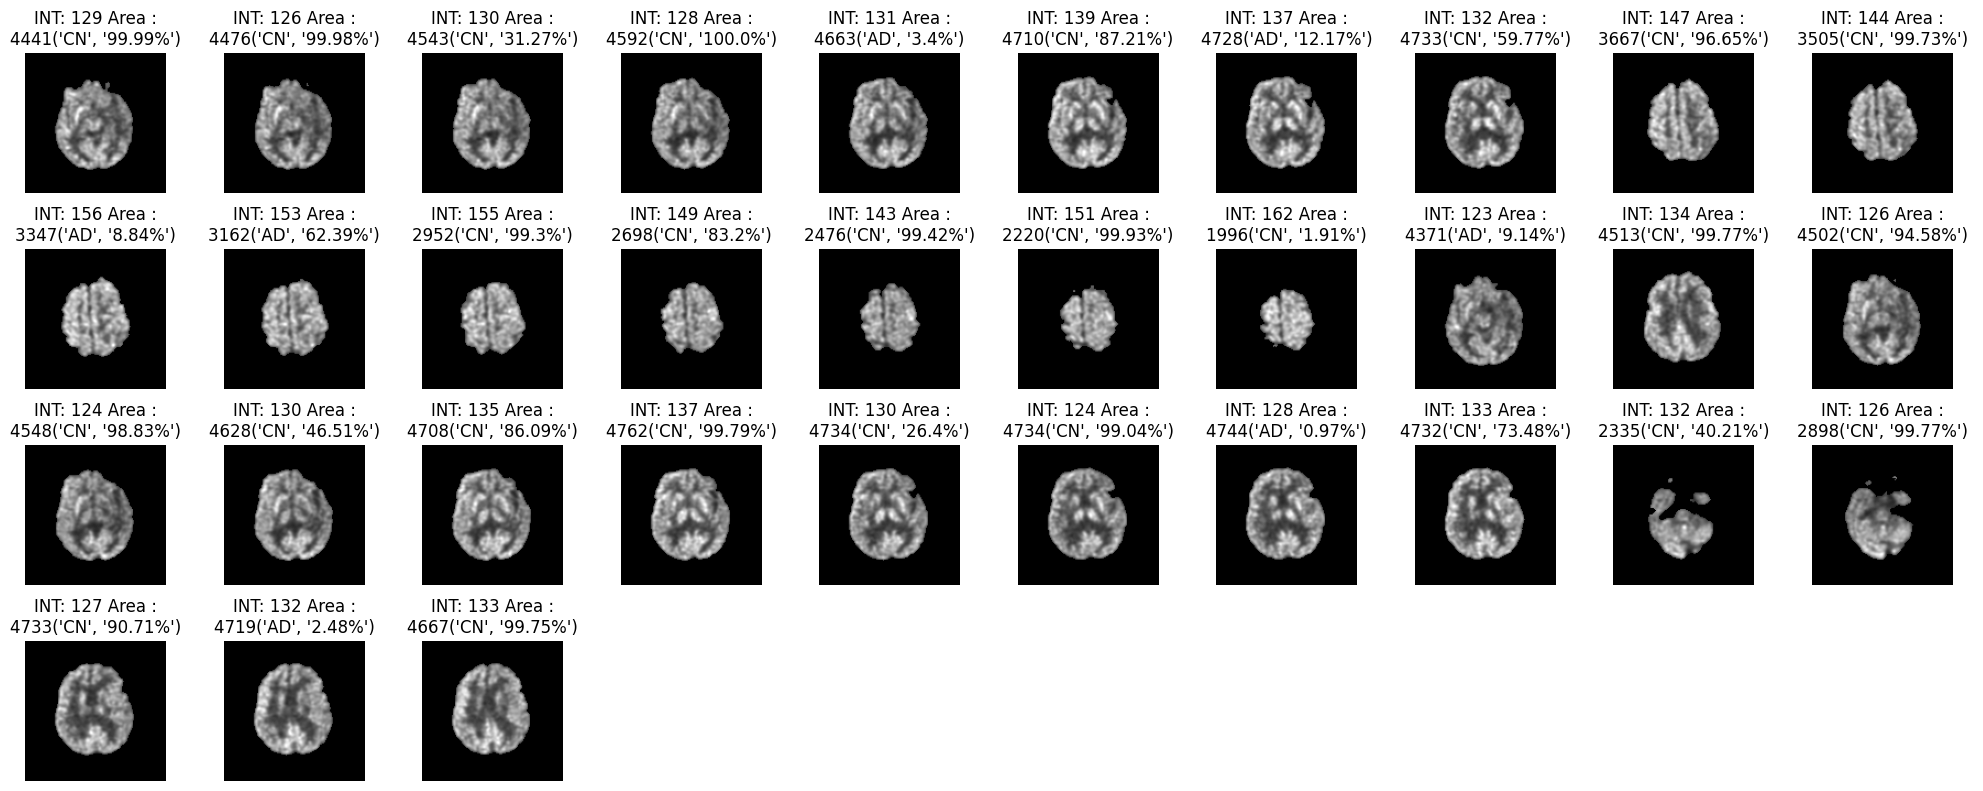

('CN', '99.99%')


In [128]:
import matplotlib.pyplot as plt
import math
from textwrap import wrap
for key, value in patient_info.items():
    print(f"{key}: {value}")

image_directory = output_folder
 # Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename, intentsity, area, pred in zip(ax_row, sorted_filenames[row_index * num_cols:], result[row_index * num_cols:], areas[row_index * num_cols:], results[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        title_l="INT: "+str(int(intentsity))+ " Area : " +str(int(area))+str(pred)
        wrapped_title = "\n".join(wrap(title_l, width=20))
        ax.set_title(wrapped_title)  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
print(results[0])

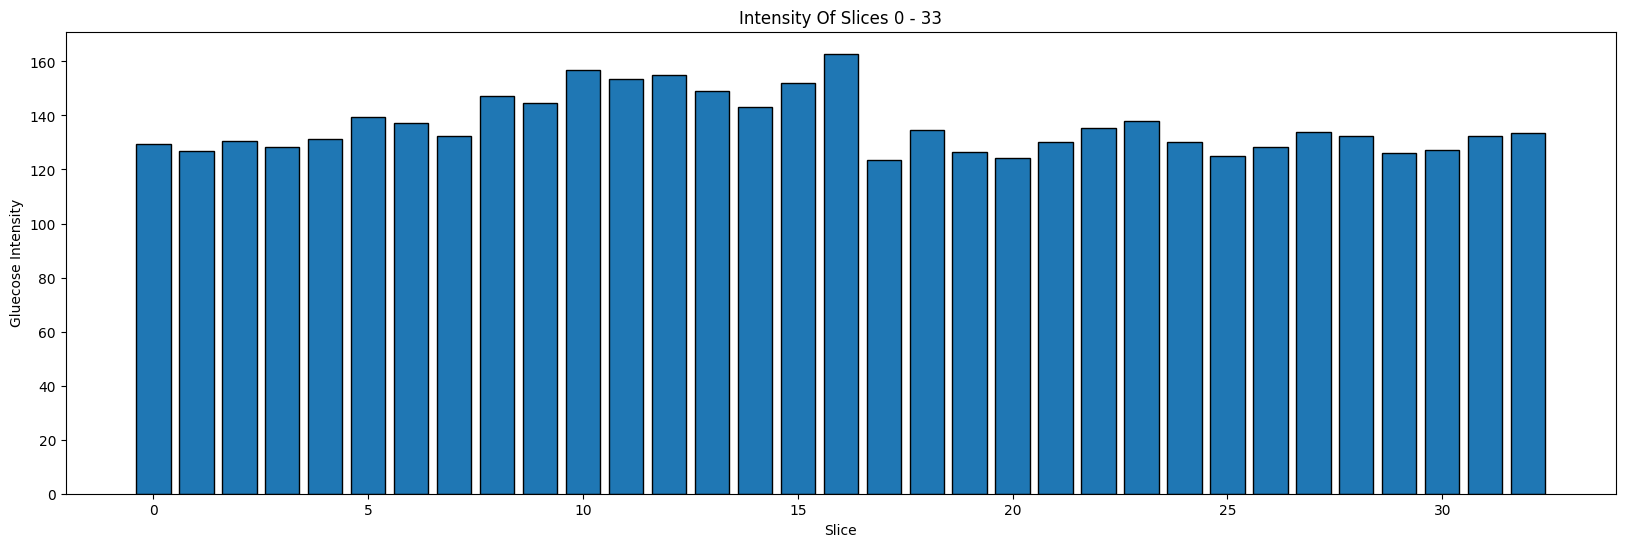

In [129]:

import matplotlib.pyplot as plt

def plot_histogram(data):
    plt.figure(figsize=(20, 6))  # Adjust the width and height of the figure as needed
    plt.bar(range(len(data)), data, align='center', edgecolor='black')
    plt.xlabel('Slice')
    plt.ylabel('Gluecose Intensity')
    plt.title('Intensity Of Slices 0 - '+str(len(data)))
    plt.xticks(range(0, len(data), 5))  # Set ticks at increments of 10
    plt.grid(False)
    plt.show()



plot_histogram(result)




Patient Name: 014_S_0548
Patient ID: 014_S_0548
Patient Birth Date: N/A
Patient Sex: F
Patient Age: N/A
Patient Weight: 56.25
Patient Address: N/A


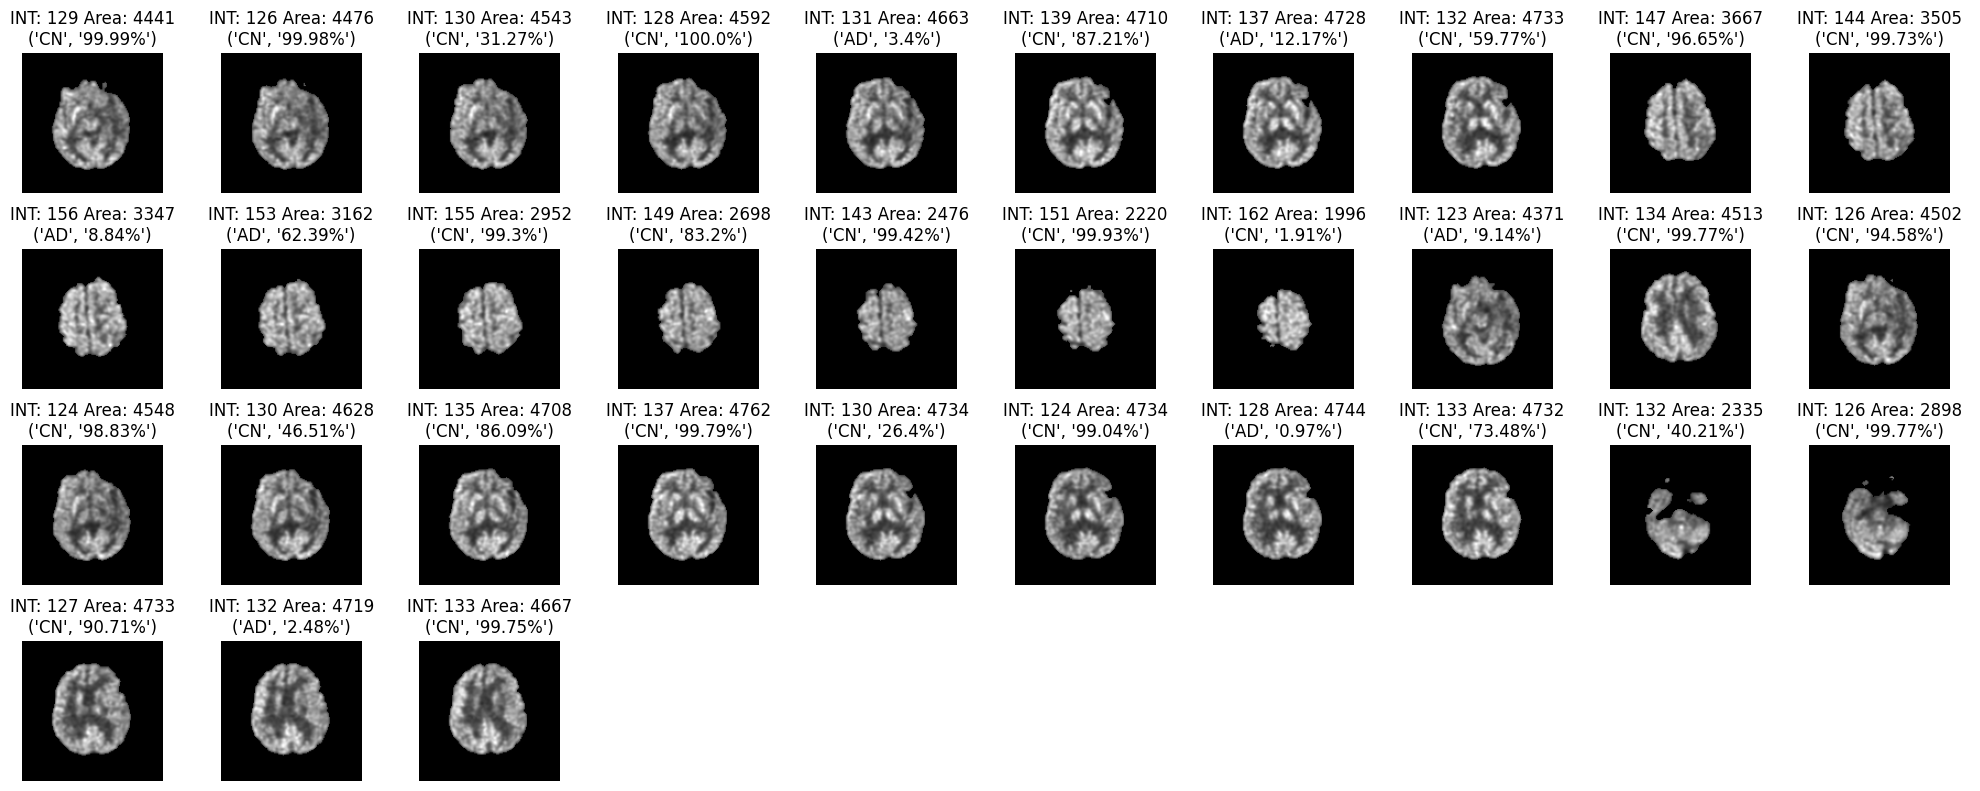

('CN', '99.99%')


In [130]:
import matplotlib.pyplot as plt
import math
from textwrap import wrap
for key, value in patient_info.items():
    print(f"{key}: {value}")

image_directory = output_folder
 # Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename, intentsity, area, pred in zip(ax_row, sorted_filenames[row_index * num_cols:], result[row_index * num_cols:], areas[row_index * num_cols:], results[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        ax.imshow(image_rgb)  # Display the RGB image
        title_l = f"INT: {int(intentsity)} Area: {int(area)} {str(pred)}"
        wrapped_title = "\n".join(wrap(title_l, width=20))
        ax.set_title(wrapped_title)  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

print(results[0])

Patient Name: 014_S_0548
Patient ID: 014_S_0548
Patient Birth Date: N/A
Patient Sex: F
Patient Age: N/A
Patient Weight: 56.25
Patient Address: N/A


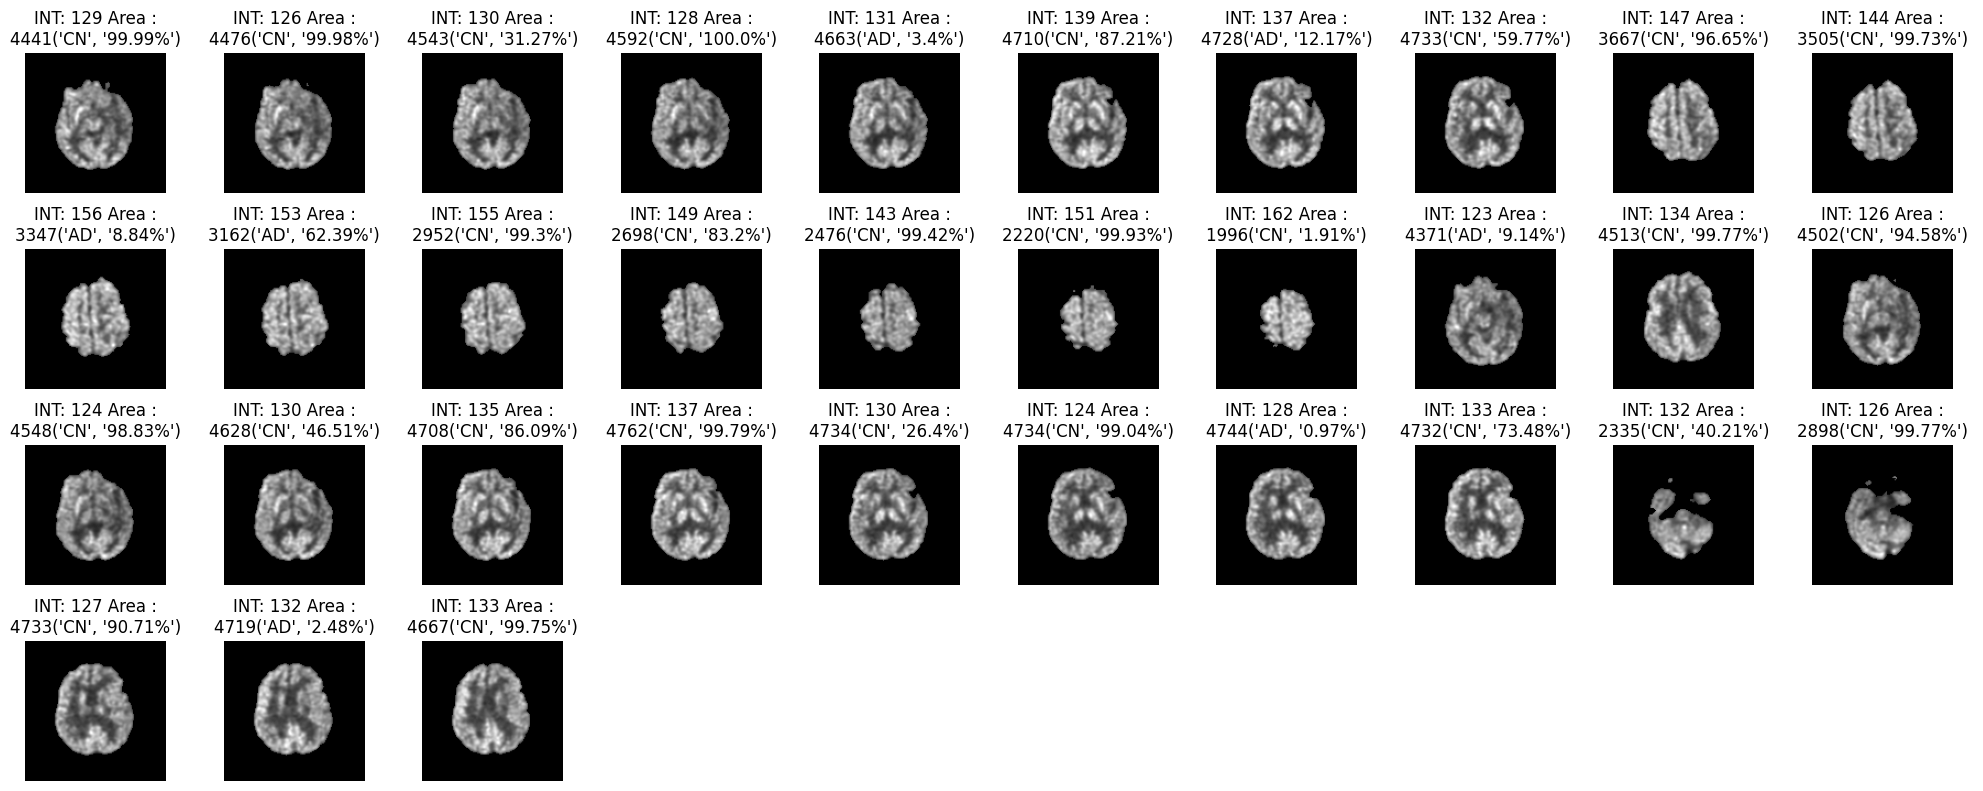

('CN', '99.99%')


In [131]:

import matplotlib.pyplot as plt
import math
from textwrap import wrap
for key, value in patient_info.items():
    print(f"{key}: {value}")

image_directory = output_folder
 # Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename, intentsity, area, pred in zip(ax_row, sorted_filenames[row_index * num_cols:], result[row_index * num_cols:], areas[row_index * num_cols:], results[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        title_l="INT: "+str(int(intentsity))+ " Area : " +str(int(area))+str(pred)
        wrapped_title = "\n".join(wrap(title_l, width=20))
        ax.set_title(wrapped_title)  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
print(results[0])

In [135]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

def natural_sort_key(s):
    """Sort string in a human-readable way, handling numbers correctly."""
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

# Load test images
def load_test_images(image_dir, image_size):
    images = []
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')], key=natural_sort_key)  # Use natural_sort_key for sorting
    
    for img_file in image_files:
        # Load image
        img_path = os.path.join(image_dir, img_file)
        img = load_img(img_path, color_mode="grayscale", target_size=image_size)
        img = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)
    
    images = np.array(images)
    return images, image_files

# Post-process the predictions to convert them to class labels
def decode_predictions(preds):
    return np.argmax(preds, axis=-1)

# Define custom color map for visualization
def apply_custom_color_map(prediction, mask_classes):
    colored_mask = np.zeros((*prediction.shape, 3))
    for class_idx, color in mask_classes.items():
        colored_mask[prediction == class_idx] = color
    return colored_mask

# Define mask classes with their corresponding colors
mask_classes = {
    0: (0, 0, 0),    # Class 0 color
    1: (255, 0, 0),  # Class 1 color
    2: (0, 255, 0),  # Class 2 color
    3: (0, 0, 255),  # Class 3 color
    4: (255, 255, 0),# Class 4 color
    5: (255, 0, 255) # Class 5 color
    # Add more colors for additional classes as needed
}

# Load test images
test_image_dir = output_folder
image_size = (128, 128)
test_images, test_image_files = load_test_images(test_image_dir, image_size)

# Load the trained model
model = load_model('unet_model.h5')

# Predict the segmentation masks
predictions = model.predict(test_images)

# Decode predictions
decoded_predictions = decode_predictions(predictions)

# Plot and save the results with custom colored masks
output_dir = 'multiclass_images_images'
os.makedirs(output_dir, exist_ok=True)

for i, pred in enumerate(decoded_predictions):
    colored_mask = apply_custom_color_map(pred, mask_classes)
    plt.imshow(test_images[i], cmap='gray')
    plt.imshow(colored_mask, alpha=0.5)  # Overlay the colored mask on the original image
    plt.axis('off')
    output_path = os.path.join(output_dir, f'prediction_{i}.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

print("Segmentation results saved successfully.")


2/2 [==============================] - 0s 93ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Segmentation results saved successfully.


Patient Name: 014_S_0548
Patient ID: 014_S_0548
Patient Birth Date: N/A
Patient Sex: F
Patient Age: N/A
Patient Weight: 56.25
Patient Address: N/A


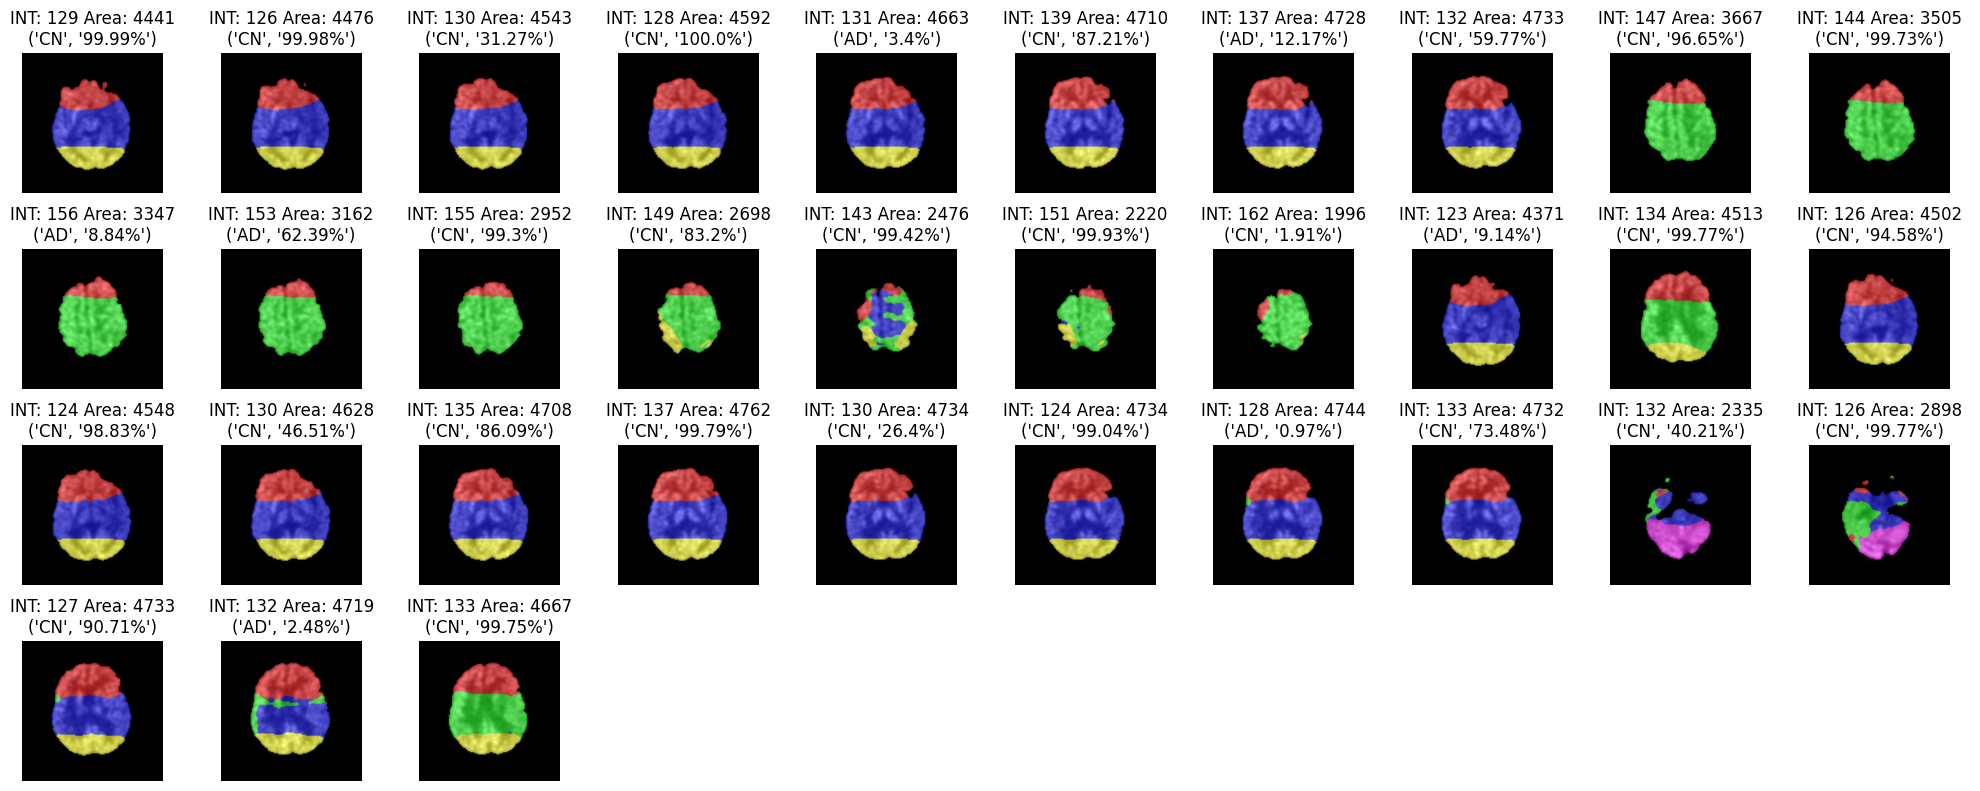

In [136]:
import matplotlib.pyplot as plt
import os
import math
import re
import cv2
from textwrap import wrap

# Assuming patient_info, output_dir, result, areas, and results are defined elsewhere in the code

for key, value in patient_info.items():
    print(f"{key}: {value}")

image_directory = output_dir
# Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename, intensity, area, pred in zip(ax_row, sorted_filenames[row_index * num_cols:], result[row_index * num_cols:], areas[row_index * num_cols:], results[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path, cv2.IMREAD_COLOR)  # Read image in color (RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format
        ax.imshow(image)
        title_l = f"INT: {int(intensity)} Area: {int(area)} {pred}"
        wrapped_title = "\n".join(wrap(title_l, width=20))
        ax.set_title(wrapped_title)  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


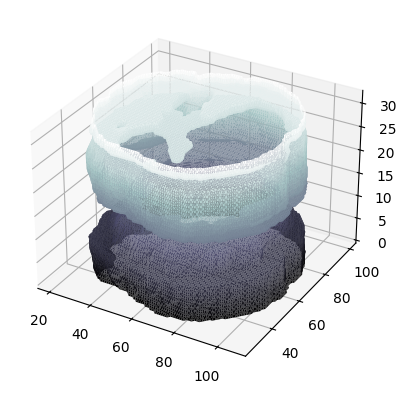

In [134]:
import skimage.io as io
import skimage.measure as measure
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def load_images(directory):
    # Function to extract numerical index from the filename
    def extract_index(filename):
        match = re.search(r'(\d+)', filename)
        return int(match.group(1)) if match else -1

    # Sort files based on the extracted numerical index
    files = sorted(
        [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.png')],
        key=lambda x: extract_index(os.path.basename(x))
    )
    
    images = [io.imread(file, as_gray=True) for file in files]
    volume = np.stack(images, axis=-1)
    return volume

def segment_brain(volume, percentile=90):
    threshold = np.percentile(volume, percentile)
    segmented = volume > threshold
    return segmented.astype(np.float32)
def natural_sort_key(s):
    """ Sort string in a human-readable way, handling numbers correctly. """
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def rename_directory(directory_path):


    # Define the directory where your images are located
    directory = directory_path



    # Get a list of all the png files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.png')]

    # Sort the files by name, using natural sort
    files.sort(key=natural_sort_key)

    # Rename each file
    for i, filename in enumerate(files):
        new_name = f"{i}.png"
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_name))

    return directory_path
    

def plot_3d(verts, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap='bone', lw=1)
    plt.show()

def extract_surface(volume, level=0.5):
    verts, faces, normals, values = measure.marching_cubes(volume, level=level)
    return verts, faces

def write_obj(filename, verts, faces):
    with open(filename, 'w') as file:
        for v in verts:
            file.write(f"v {v[0]} {v[1]} {v[2]}\n")
        for face in faces:
            file.write("f {} {} {}\n".format(face[0] + 1, face[1] + 1, face[2] + 1))

#threshold = int(input("Input Threshold: "))


volume = load_images(rename_directory(output_folder))
segmented_volume = segment_brain(volume, 20)
verts, faces = extract_surface(segmented_volume)
plot_3d(verts, faces)
write_obj("output_brain_model.obj", verts, faces)


